In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
sns.set(rc={'figure.figsize':(14,12)})


In [2]:
playlist_data = pd.read_parquet('PlaylistTracks.parquet')

In [3]:
playlist_data.head(2)

,name,artist_name,album_name,album_date,album_popularity,track_duration,danceability,energy,instrumentalness,liveness,tempo,artist_url,date_added,album_year,track_duration_secs
0,Panteão,Linda Martini,Turbo Lento,2013-01-01,22,00:04:12,0.352,0.911,0.647,0.503,158.025,https://open.spotify.com/artist/4Pv6qAkea25i2D...,2013-10-06,2013,252
1,purr,Tides From Nebula,Aura,2009-01-01,0,00:04:19,0.115,0.646,0.957,0.367,167.241,https://open.spotify.com/artist/1CzKORB9IN0EjP...,2013-10-06,2009,259


### How many songs are in the playlist?

In [5]:
playlist_data['name'].count()

1220

### How many artists are in the playlist?

In [6]:
playlist_data['artist_name'].nunique()

716

### How many albums are in the playlist?

In [7]:
playlist_data['album_name'].nunique()

992

### Which are the most represented artists?

By number of songs

In [31]:
artist_songs_aggregated = playlist_data[['artist_name','name']].groupby('artist_name').agg({'name':'count'})

In [32]:
artist_songs_aggregated_top_10 = artist_songs_aggregated.sort_values(by='name', ascending=False).iloc[0:10,:].reset_index()

[Text(0, 0, 'Queens of the Stone Age'),
 Text(1, 0, 'Foo Fighters'),
 Text(2, 0, 'Arctic Monkeys'),
 Text(3, 0, 'The Mars Volta'),
 Text(4, 0, 'Linda Martini'),
 Text(5, 0, 'Citizen'),
 Text(6, 0, 'Wavves'),
 Text(7, 0, 'The Strokes'),
 Text(8, 0, 'Wolfmother'),
 Text(9, 0, 'The Growlers')]

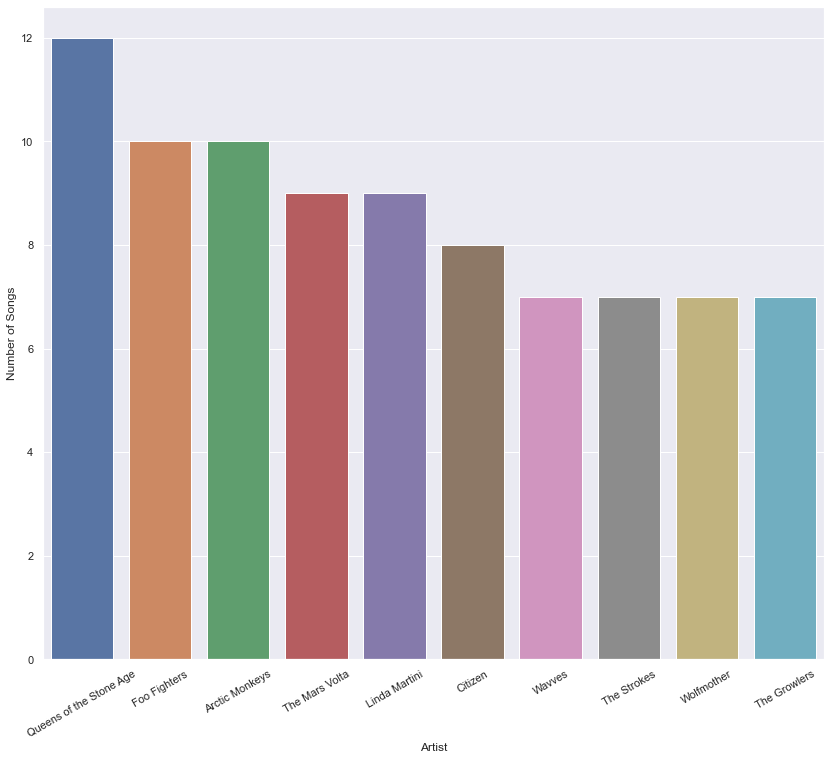

In [34]:
top10_artists_by_songs = sns.barplot(data=artist_songs_aggregated_top_10, x='artist_name',y='name')
top10_artists_by_songs.set_xlabel('Artist')
top10_artists_by_songs.set_ylabel('Number of Songs')
top10_artists_by_songs.set_xticklabels(top10_artists_by_songs.get_xticklabels(),rotation = 45)


By number of albums

In [39]:
artist_albums_aggregated = playlist_data[['artist_name','album_name']].groupby('artist_name').agg({'album_name':'nunique'})

In [42]:
artist_albums_aggregated_top_10 = artist_albums_aggregated.sort_values(by='album_name', ascending=False).iloc[0:10,:].reset_index()

[Text(0, 0, 'Queens of the Stone Age'),
 Text(1, 0, 'Arctic Monkeys'),
 Text(2, 0, 'Wavves'),
 Text(3, 0, 'Red Hot Chili Peppers'),
 Text(4, 0, 'The Mars Volta'),
 Text(5, 0, 'The Strokes'),
 Text(6, 0, 'Local Natives'),
 Text(7, 0, 'Tame Impala'),
 Text(8, 0, 'Foo Fighters'),
 Text(9, 0, 'Nirvana')]

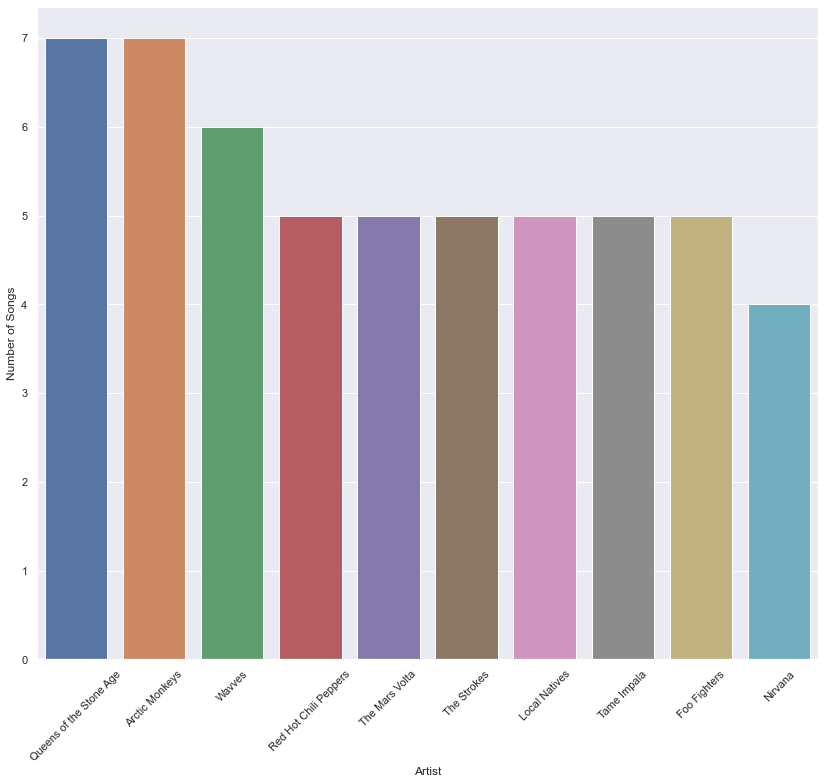

In [43]:
top10_artists_by_albums = sns.barplot(data=artist_albums_aggregated_top_10, x='artist_name',y='album_name')
top10_artists_by_albums.set_xlabel('Artist')
top10_artists_by_albums.set_ylabel('Number of Albums')
top10_artists_by_albums.set_xticklabels(top10_artists_by_albums.get_xticklabels(),rotation = 45)

By number of minutes

In [48]:
artist_minutes_aggregated = playlist_data[['artist_name','track_duration_secs']].groupby('artist_name').agg({'track_duration_secs':'sum'})

In [49]:
artist_minutes_aggregated_top_10 = artist_minutes_aggregated.sort_values(by='track_duration_secs', ascending=False).iloc[0:10,:].reset_index()

[Text(0, 0, 'The Mars Volta'),
 Text(1, 0, 'Queens of the Stone Age'),
 Text(2, 0, 'Foo Fighters'),
 Text(3, 0, 'Linda Martini'),
 Text(4, 0, 'Arctic Monkeys'),
 Text(5, 0, 'Foals'),
 Text(6, 0, 'Oceansize'),
 Text(7, 0, 'Wolfmother'),
 Text(8, 0, 'Tame Impala'),
 Text(9, 0, 'Citizen')]

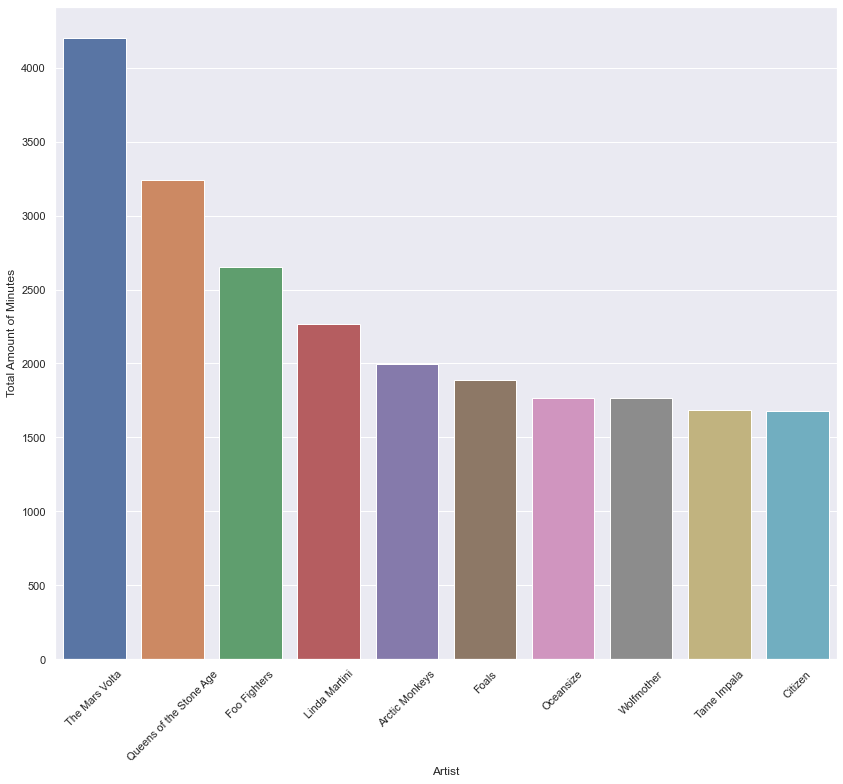

In [51]:
top10_artists_by_minutes = sns.barplot(data=artist_minutes_aggregated_top_10, x='artist_name',y='track_duration_secs')
top10_artists_by_minutes.set_xlabel('Artist')
top10_artists_by_minutes.set_ylabel('Total Amount of Minutes')
top10_artists_by_minutes.set_xticklabels(top10_artists_by_minutes.get_xticklabels(),rotation = 45)

### How were the songs added throughout time?

In [59]:
playlist_data['year_added'] = playlist_data['date_added'].dt.year

In [65]:
year_added_songs_aggregated = playlist_data[['year_added','name']].groupby('year_added').agg({'name':'count'}).reset_index()

Text(0, 0.5, 'Total Amount of Songs Added')

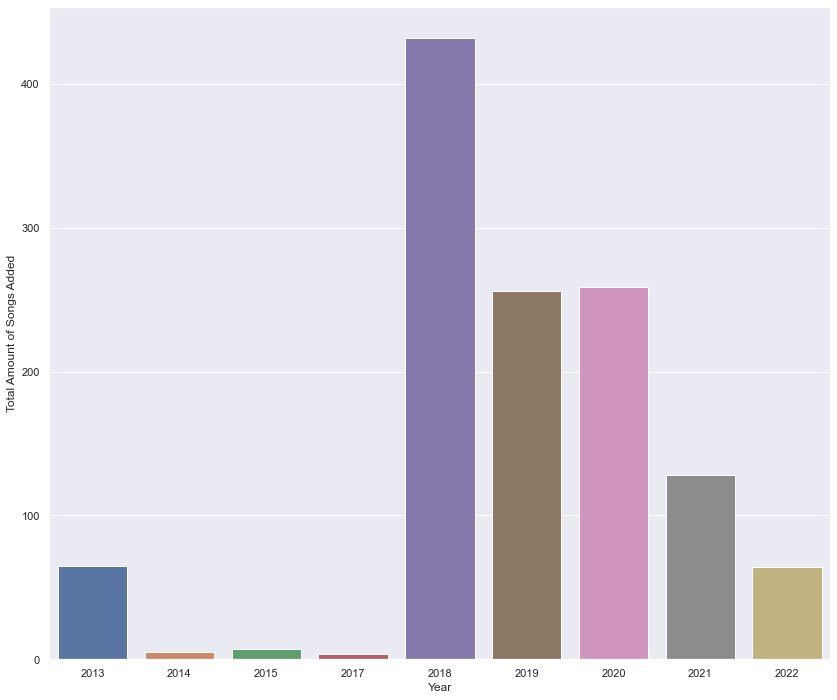

In [67]:
year_added_songs_aggregated_plot = sns.barplot(data=year_added_songs_aggregated, x='year_added', y='name')
year_added_songs_aggregated_plot.set_xlabel('Year')
year_added_songs_aggregated_plot.set_ylabel('Total Amount of Songs Added')

### Which years are the songs from?

In [70]:
year_album_songs_aggregated = playlist_data[['album_year','name']].groupby('album_year').agg({'name':'count'}).reset_index()

[Text(0, 0, '1967'),
 Text(1, 0, '1968'),
 Text(2, 0, '1969'),
 Text(3, 0, '1970'),
 Text(4, 0, '1971'),
 Text(5, 0, '1972'),
 Text(6, 0, '1988'),
 Text(7, 0, '1989'),
 Text(8, 0, '1991'),
 Text(9, 0, '1992'),
 Text(10, 0, '1993'),
 Text(11, 0, '1994'),
 Text(12, 0, '1995'),
 Text(13, 0, '1996'),
 Text(14, 0, '1997'),
 Text(15, 0, '1998'),
 Text(16, 0, '1999'),
 Text(17, 0, '2000'),
 Text(18, 0, '2001'),
 Text(19, 0, '2002'),
 Text(20, 0, '2003'),
 Text(21, 0, '2004'),
 Text(22, 0, '2005'),
 Text(23, 0, '2006'),
 Text(24, 0, '2007'),
 Text(25, 0, '2008'),
 Text(26, 0, '2009'),
 Text(27, 0, '2010'),
 Text(28, 0, '2011'),
 Text(29, 0, '2012'),
 Text(30, 0, '2013'),
 Text(31, 0, '2014'),
 Text(32, 0, '2015'),
 Text(33, 0, '2016'),
 Text(34, 0, '2017'),
 Text(35, 0, '2018'),
 Text(36, 0, '2019'),
 Text(37, 0, '2020'),
 Text(38, 0, '2021'),
 Text(39, 0, '2022')]

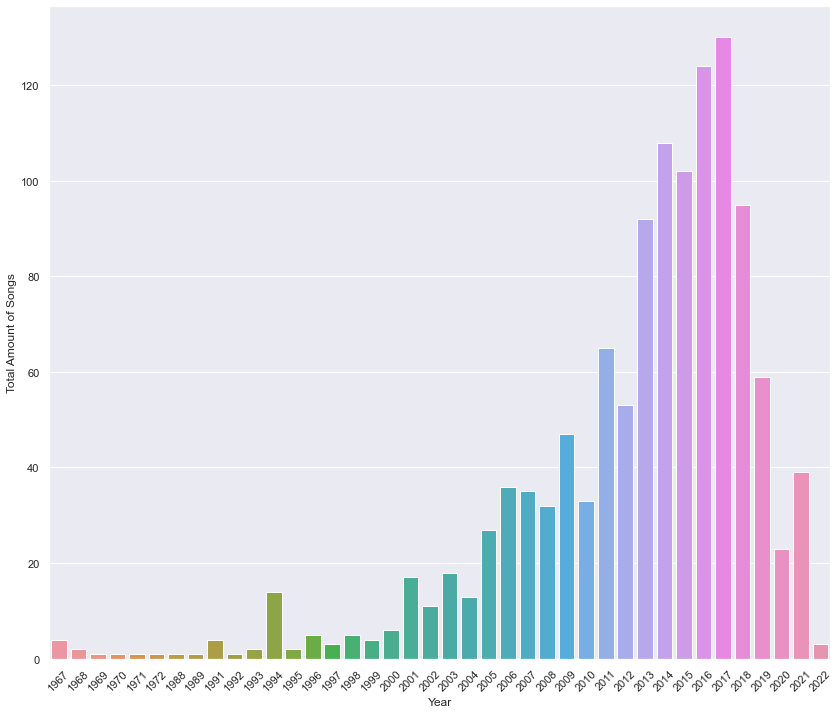

In [73]:
year_album_songs_aggregated_plot = sns.barplot(data=year_album_songs_aggregated, x='album_year', y='name')
year_album_songs_aggregated_plot.set_xlabel('Year')
year_album_songs_aggregated_plot.set_ylabel('Total Amount of Songs')
year_album_songs_aggregated_plot.set_xticklabels(year_album_songs_aggregated_plot.get_xticklabels(),rotation = 45)

### How are the songs features distributed?

Features will be separated due to the huge difference in magnitude which would render the boxplots for small features useless

Small features (in the range of [0,1])

In [80]:
playlist_data_small_features = playlist_data[['danceability','energy','liveness','instrumentalness']]
playlist_data_small_features_melt = pd.melt(playlist_data_small_features, id_vars=[], var_name=['feature'])

<AxesSubplot:xlabel='feature', ylabel='value'>

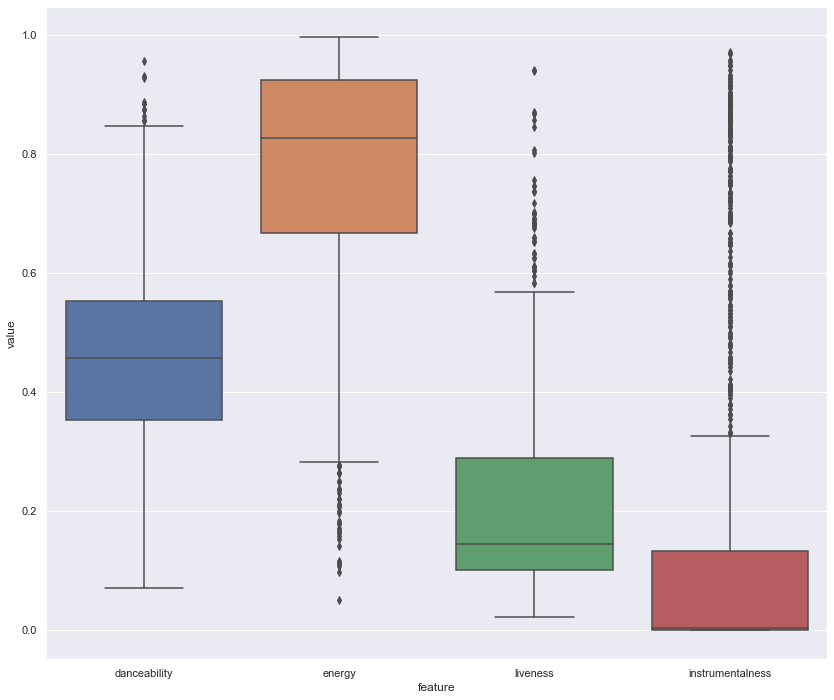

In [82]:
sns.boxplot(data=playlist_data_small_features_melt, x='feature', y='value')

Big features (features in the range of 100s)

In [83]:
playlist_data_big_features = playlist_data[['tempo','track_duration_secs']]
playlist_data_big_features_melt = pd.melt(playlist_data_big_features, id_vars=[], var_name=['feature'])

<AxesSubplot:xlabel='feature', ylabel='value'>

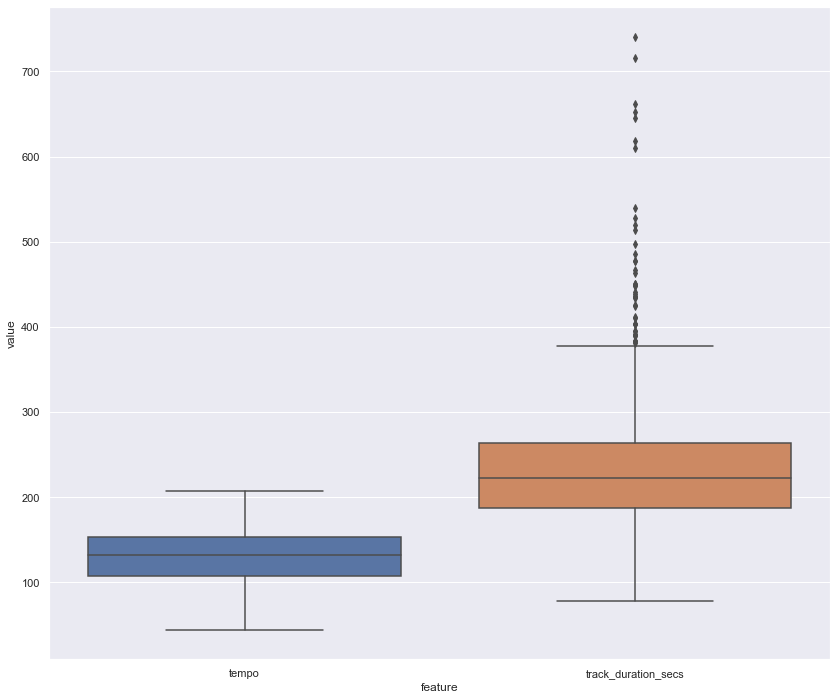

In [84]:
sns.boxplot(data=playlist_data_big_features_melt, x='feature', y='value')